<a href="https://colab.research.google.com/github/Kanyatte/Autolib-Electric-Car-Sharing-Company/blob/master/DSC5_BANK_ANALYSIS_Kanyatte_Macharia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Defining the Question

### a) Specifying the Question

Predicting the people who are most likely to have a bank account in East Africa.

### b) Defining the Metric for Success



Viewing the comparison between:
- The type of job, level of education of a person and whether the person has a bank account.
- The location in which a person stays and whether the person has a bank account.
will help us implement the research problem.

### c) Understanding the context 



Banking has been proven to be a major indicator to Financial inclusion since it aids companies which may need a huge amount of capital in implementing their business objectives and facilitates payment from one person to another. As an upcoming data scientist, I am tasked to determine some of the factors contributing to having a bank account in East Africa so as to know the state of financial inclusion.

### d) Recording the Experimental Design

- Renaming columns so as to have a uniform and neat format.
- Dropping some of the columns since they are not required in analysis.
- Checking for the presence of outliers.
- Retaining outliers since they are realistic.
- Checking for anomalies present.
- Removing anomalies since they are not many and also affect the whole dataset especially during analysis. 
- Checking for the number of missing values in each column.
- Getting rid of missing values because they hinder data analysis.
- Changing the datatype of the age column from float to integer because age can only be a whole number.

### e) Data Relevance

The data fits with the problem which is to be solved since it will enable us to determine what could be a huge cause for people having or not having bank accounts.

## 2. Reading the Data

In [ ]:
# Importing the libraries to be used
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Reading the dataset
finance = pd.read_csv('http://bit.ly/FinancialDataset')
finance

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


## 3. Checking the Data

In [ ]:
# Number of rows and colums in the dataset
finance.shape

(23524, 13)

In [ ]:
# Previewing the head of the dataset
finance.head()

,Country,Bank_Account,Location_Type,Respondent_Age,Respondent_Gender,Marital_Status,Education_Level,Job_Type
0,Kenya,Yes,Rural,24.0,Female,Married/Living together,Secondary education,Self employed
1,Kenya,No,Rural,70.0,Female,Widowed,No formal education,Government Dependent
2,Kenya,Yes,Urban,26.0,Male,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,No,Rural,34.0,Female,Married/Living together,Primary education,Formally employed Private
4,Kenya,No,Urban,26.0,Male,Single/Never Married,Primary education,Informally employed


In [ ]:
# Previewing the tail
finance.tail()

,Country,Bank_Account,Location_Type,Respondent_Age,Respondent_Gender,Marital_Status,Education_Level,Job_Type
23519,Uganda,No,Rural,48.0,Female,Divorced/Seperated,No formal education,Other Income
23520,Uganda,No,Rural,27.0,Female,Single/Never Married,Secondary education,Other Income
23521,Uganda,No,Rural,27.0,Female,Widowed,Primary education,Other Income
23522,Uganda,No,Urban,30.0,Female,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,No,Rural,20.0,Male,Single/Never Married,Secondary education,No Income


In [ ]:
# Accessing information about our dataset
finance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


## 4. Tidying the Dataset

In [ ]:
# Renaming columns
finance.columns = ['Country', 'Year', 'Unique_ID', 'Bank_Account', 'Location_Type', 'Phone_Access', 'Household_Size', 'Respondent_Age', 'Respondent_Gender', 'Relationship_With_Head', 'Marital_Status', 'Education_Level', 'Job_Type']
finance

,Country,Year,Unique_ID,Bank_Account,Location_Type,Phone_Access,Household_Size,Respondent_Age,Respondent_Gender,Relationship_With_Head,Marital_Status,Education_Level,Job_Type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [ ]:
#Dropping columns
finance.drop(['Year', 'Phone_Access', 'Unique_ID', 'Household_Size', 'Relationship_With_Head'], axis=1, inplace=True)
finance

,Country,Bank_Account,Location_Type,Respondent_Age,Respondent_Gender,Marital_Status,Education_Level,Job_Type
0,Kenya,Yes,Rural,24.0,Female,Married/Living together,Secondary education,Self employed
1,Kenya,No,Rural,70.0,Female,Widowed,No formal education,Government Dependent
2,Kenya,Yes,Urban,26.0,Male,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,No,Rural,34.0,Female,Married/Living together,Primary education,Formally employed Private
4,Kenya,No,Urban,26.0,Male,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...
23519,Uganda,No,Rural,48.0,Female,Divorced/Seperated,No formal education,Other Income
23520,Uganda,No,Rural,27.0,Female,Single/Never Married,Secondary education,Other Income
23521,Uganda,No,Rural,27.0,Female,Widowed,Primary education,Other Income
23522,Uganda,No,Urban,30.0,Female,Divorced/Seperated,Secondary education,Self employed


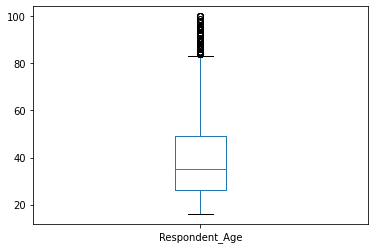

In [ ]:
Checking outliers in the dataset
finance.boxplot(column =['Respondent_Age'], grid = False) 

In [ ]:
# Showing the number of unique values in each column to look for anomalies since the number of unique values was specified in
# the description to the dataset
finance.nunique()

Country               4
Bank_Account          2
Location_Type         2
Respondent_Age       85
Respondent_Gender     2
Marital_Status        5
Education_Level       7
Job_Type             10
dtype: int64

In [ ]:
# Checking for anomalies through identifying the unique values in the Education_Level column
finance['Education_Level'].value_counts()

Primary education                  12775
No formal education                 4506
Secondary education                 4220
Tertiary education                  1156
Vocational/Specialised training      803
6                                     27
Other/Dont know/RTA                    8
Name: Education_Level, dtype: int64

In [ ]:
# Eliminating the anomaly in the column
finance1 = finance[(finance['Education_Level'] != '6')]
finance1

,Country,Bank_Account,Location_Type,Respondent_Age,Respondent_Gender,Marital_Status,Education_Level,Job_Type
0,Kenya,Yes,Rural,24.0,Female,Married/Living together,Secondary education,Self employed
1,Kenya,No,Rural,70.0,Female,Widowed,No formal education,Government Dependent
2,Kenya,Yes,Urban,26.0,Male,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,No,Rural,34.0,Female,Married/Living together,Primary education,Formally employed Private
4,Kenya,No,Urban,26.0,Male,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...
23519,Uganda,No,Rural,48.0,Female,Divorced/Seperated,No formal education,Other Income
23520,Uganda,No,Rural,27.0,Female,Single/Never Married,Secondary education,Other Income
23521,Uganda,No,Rural,27.0,Female,Widowed,Primary education,Other Income
23522,Uganda,No,Urban,30.0,Female,Divorced/Seperated,Secondary education,Self employed


In [ ]:
# Checking the number of null values in each column
finance1.isnull().sum()

Country              14
Bank_Account         36
Location_Type        15
Respondent_Age       34
Respondent_Gender    34
Marital_Status       32
Education_Level      29
Job_Type             30
dtype: int64

In [ ]:
# Dropping missing values
finance2 = finance1.dropna()
finance2

,Country,Bank_Account,Location_Type,Respondent_Age,Respondent_Gender,Marital_Status,Education_Level,Job_Type
0,Kenya,Yes,Rural,24.0,Female,Married/Living together,Secondary education,Self employed
1,Kenya,No,Rural,70.0,Female,Widowed,No formal education,Government Dependent
2,Kenya,Yes,Urban,26.0,Male,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,No,Rural,34.0,Female,Married/Living together,Primary education,Formally employed Private
4,Kenya,No,Urban,26.0,Male,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...
23519,Uganda,No,Rural,48.0,Female,Divorced/Seperated,No formal education,Other Income
23520,Uganda,No,Rural,27.0,Female,Single/Never Married,Secondary education,Other Income
23521,Uganda,No,Rural,27.0,Female,Widowed,Primary education,Other Income
23522,Uganda,No,Urban,30.0,Female,Divorced/Seperated,Secondary education,Self employed


In [ ]:
#Converting age column to integer
finance2['Respondent_Age'] = finance2['Respondent_Age'].astype(int)
finance2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23337 entries, 0 to 23523
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Country            23337 non-null  object
 1   Bank_Account       23337 non-null  object
 2   Location_Type      23337 non-null  object
 3   Respondent_Age     23337 non-null  int64 
 4   Respondent_Gender  23337 non-null  object
 5   Marital_Status     23337 non-null  object
 6   Education_Level    23337 non-null  object
 7   Job_Type           23337 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.6+ MB


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## 5. Exploratory Analysis

In [ ]:
Describing dataset by country
finance2.groupby('Country').describe()

Respondent_Age                                                     
                  count       mean        std   min   25%   50%   75%    max
Country                                                                     
Kenya            6064.0  39.620218  17.215693  16.0  26.0  35.0  50.0   95.0
Rwanda           8674.0  39.245907  16.249079  16.0  27.0  35.0  49.0   99.0
Tanzania         6504.0  38.473401  16.434949  16.0  26.0  35.0  48.0  100.0
Uganda           2095.0  35.478759  15.300442  16.0  24.0  31.0  45.0   98.0

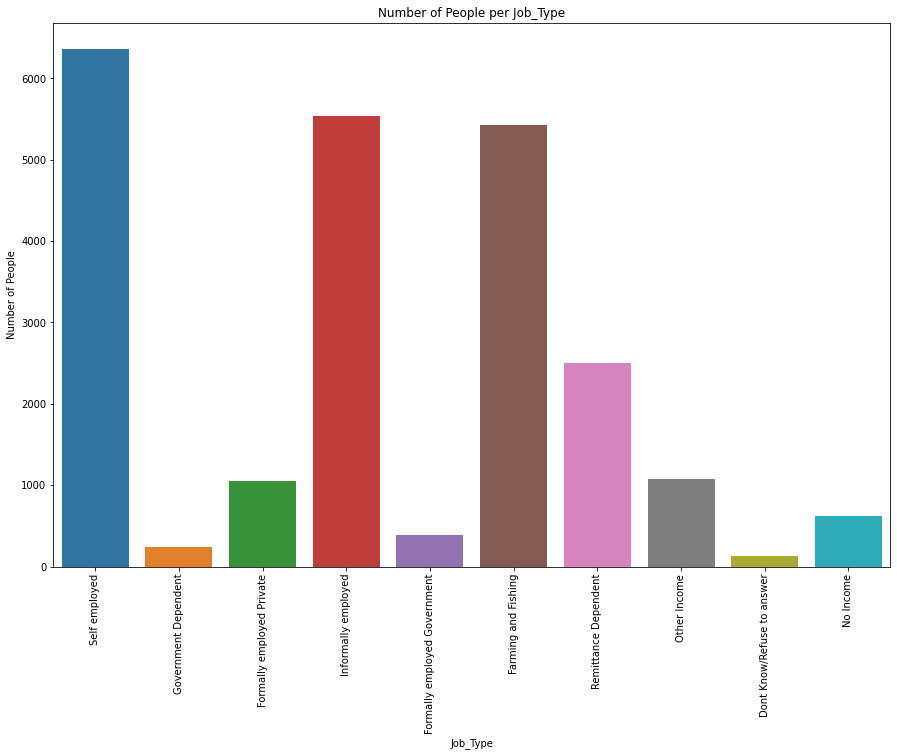

In [ ]:
# Plotting a bar graph of the number of people against the Type of Job
plt.figure(figsize=(15,10))
sns.countplot(x='Job_Type', data=finance2)
# Labelling our x axis
plt.xlabel("Job_Type")
# Rotating the labels on the x axis
plt.xticks(rotation = 90)
# Labelling our y axis
plt.ylabel("Number of People")
# Giving a title to our Bar chart
plt.title("Number of People per Job_Type")
# Displaying our chart
plt.show()
# Self Employed job type has the majority of the people while Refuse to answer has the least followed by government dependent

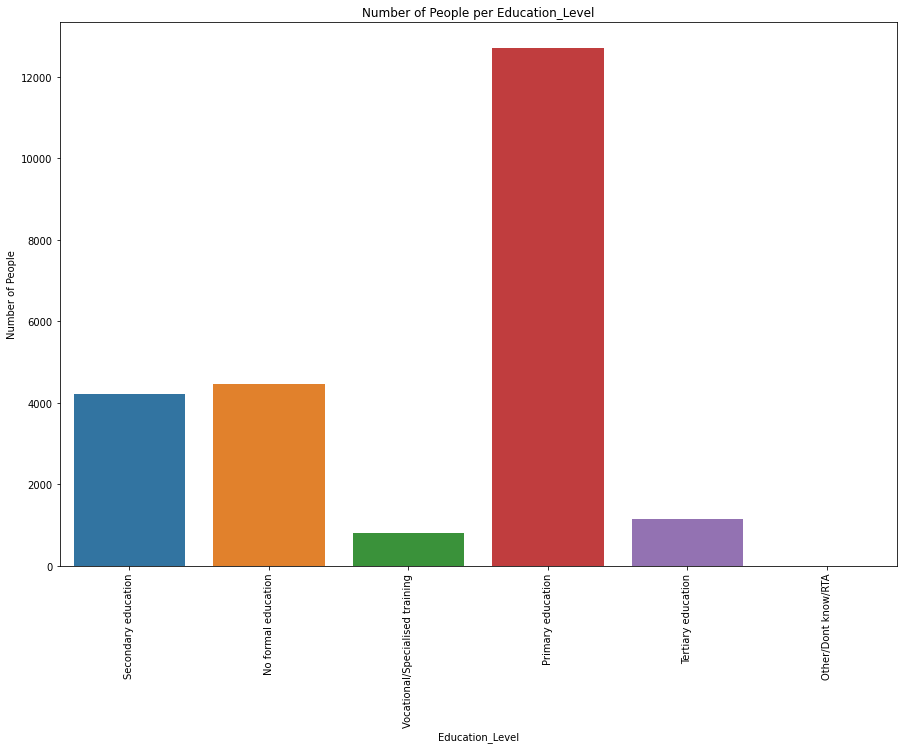

In [ ]:
# Plotting a bar graph of the number of people against the Level of Education
plt.figure(figsize=(15,10))
sns.countplot(x='Education_Level', data=finance2)
# Labelling our x axis
plt.xlabel("Education_Level")
# Rotating the labels on the x axis
plt.xticks(rotation = 90)
# Labelling our y axis
plt.ylabel("Number of People")
# Giving a title to our Bar chart
plt.title("Number of People per Education_Level")
# Displaying our chart
plt.show()
# Most People have reached primary education as the highest level while the least don't know followed by specialised training

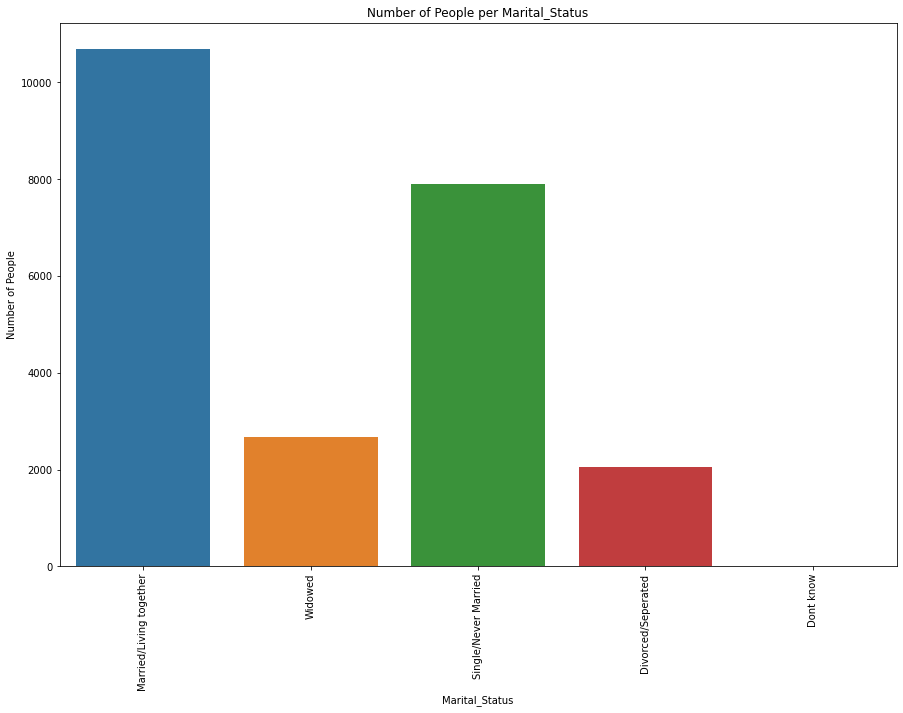

In [ ]:
# Plotting a bar graph of the number of people against the MaritalStatus
plt.figure(figsize=(15,10))
sns.countplot(x='Marital_Status', data=finance2)
# Labelling our x axis
plt.xlabel("Marital_Status")
# Rotating the labels on the x axis
plt.xticks(rotation = 90)
# Labelling our y axis
plt.ylabel("Number of People")
# Giving a title to our Bar chart
plt.title("Number of People per Marital_Status")
# Displaying our chart
plt.show()
# Many are married or living together while the least don't know followed by divorced or separated

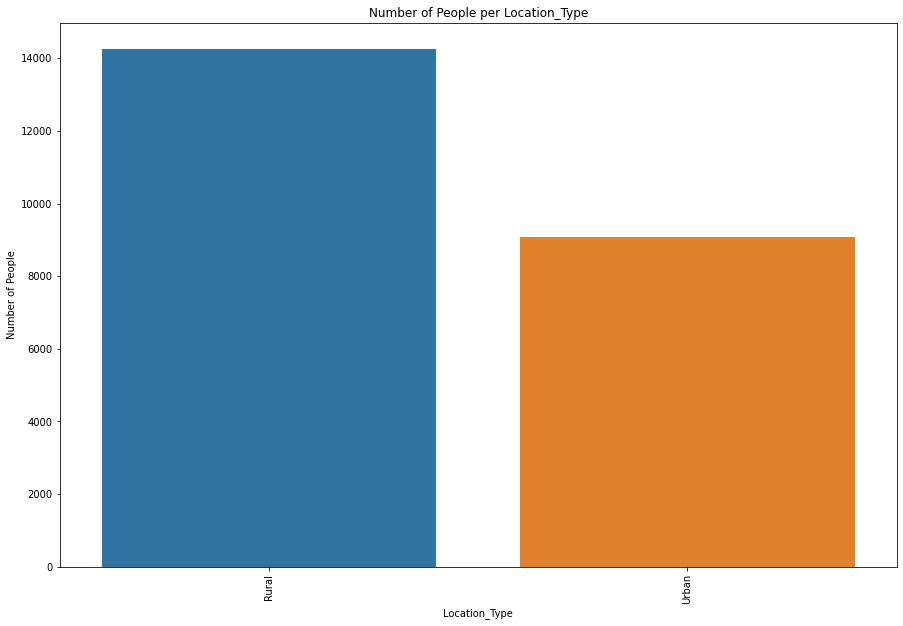

In [ ]:
# Plotting a bar graph of the number of people against the Type of Location
plt.figure(figsize=(15,10))
sns.countplot(x='Location_Type', data=finance2)
# Labelling our x axis
plt.xlabel("Location_Type")
# Rotating the labels on the x axis
plt.xticks(rotation = 90)
# Labelling our y axis
plt.ylabel("Number of People")
# Giving a title to our Bar chart
plt.title("Number of People per Location_Type")
# Displaying our chart
plt.show()
# Many are in the rural area

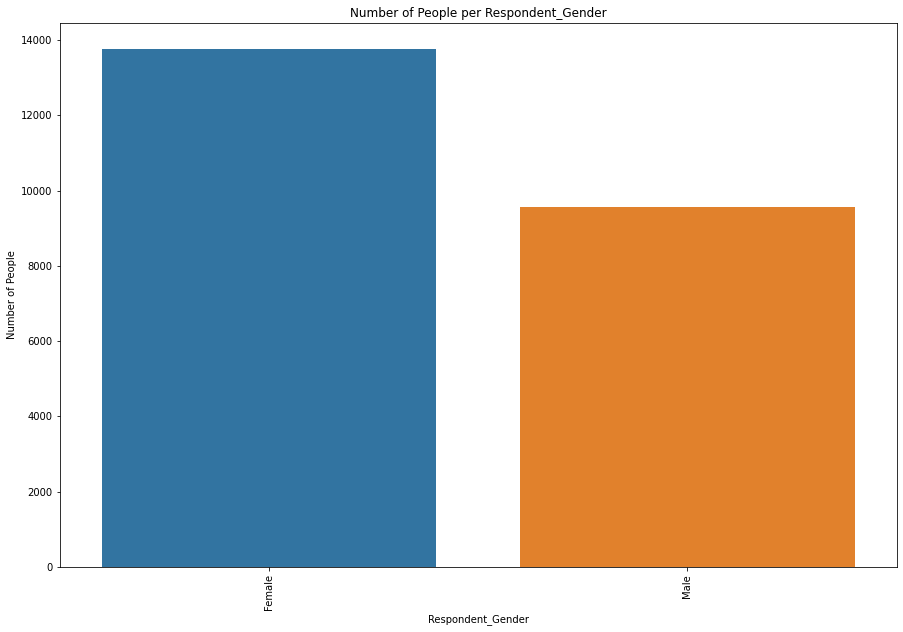

In [ ]:
# Plotting a bar graph of the number of people against the Gender of the Respondent
plt.figure(figsize=(15,10))
sns.countplot(x='Respondent_Gender', data=finance2)
# Labelling our x axis
plt.xlabel("Respondent_Gender")
# Rotating the labels on the x axis
plt.xticks(rotation = 90)
# Labelling our y axis
plt.ylabel("Number of People")
# Giving a title to our Bar chart
plt.title("Number of People per Respondent_Gender")
# Displaying our chart
plt.show()
# Most people are female in the survey

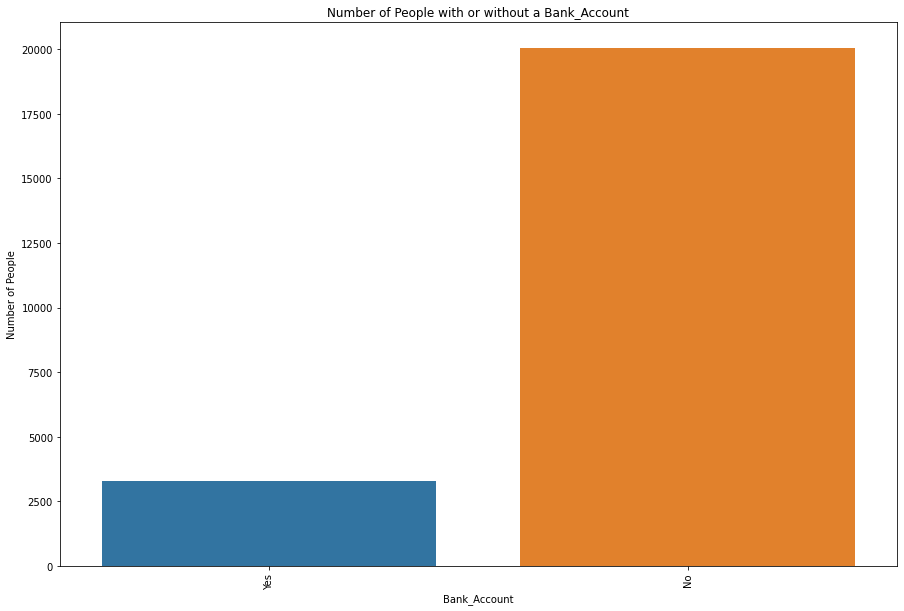

In [ ]:
# Plotting a bar graph of the number of people against whether the person has a Bank Account
plt.figure(figsize=(15,10))
sns.countplot(x='Bank_Account', data=finance2)
# Labelling our x axis
plt.xlabel("Bank_Account")
# Rotating the labels on the x axis
plt.xticks(rotation = 90)
# Labelling our y axis
plt.ylabel("Number of People")
# Giving a title to our Bar chart
plt.title("Number of People with or without a Bank_Account")
# Displaying our chart
plt.show()
# Most don't have a bank account

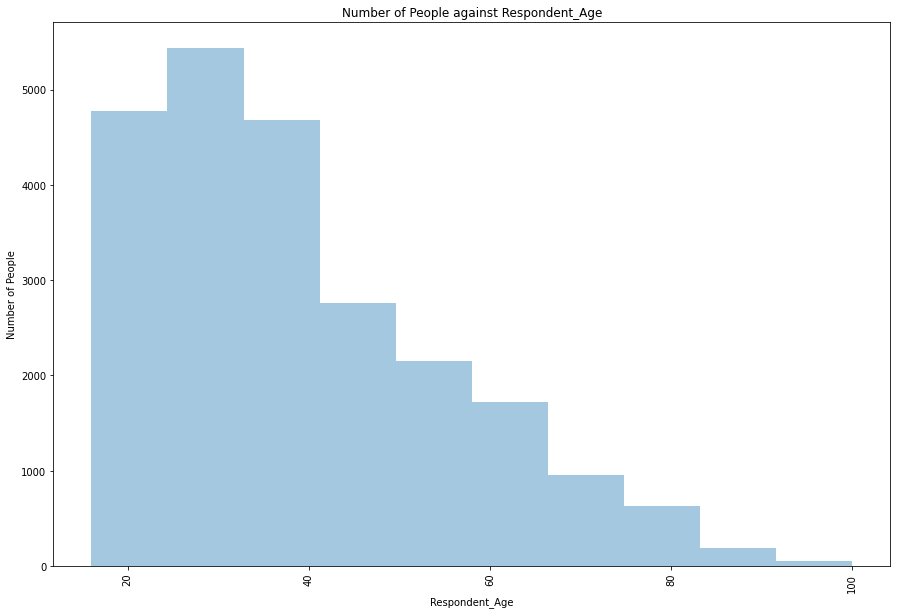

In [ ]:
# Plotting a histogram of the Number of People against their age
plt.figure(figsize=(15,10))
sns.distplot(finance2.Respondent_Age, kde=False, bins = 10)
# Labelling our x axis
plt.xlabel("Respondent_Age")
# Rotating the labels on the x axis
plt.xticks(rotation = 90)
# Labelling our y axis
plt.ylabel("Number of People")
# Giving a title to our Bar chart
plt.title("Number of People against Respondent_Age")
# Displaying our chart
plt.show()
# Most people lie in the age of 20-40 years

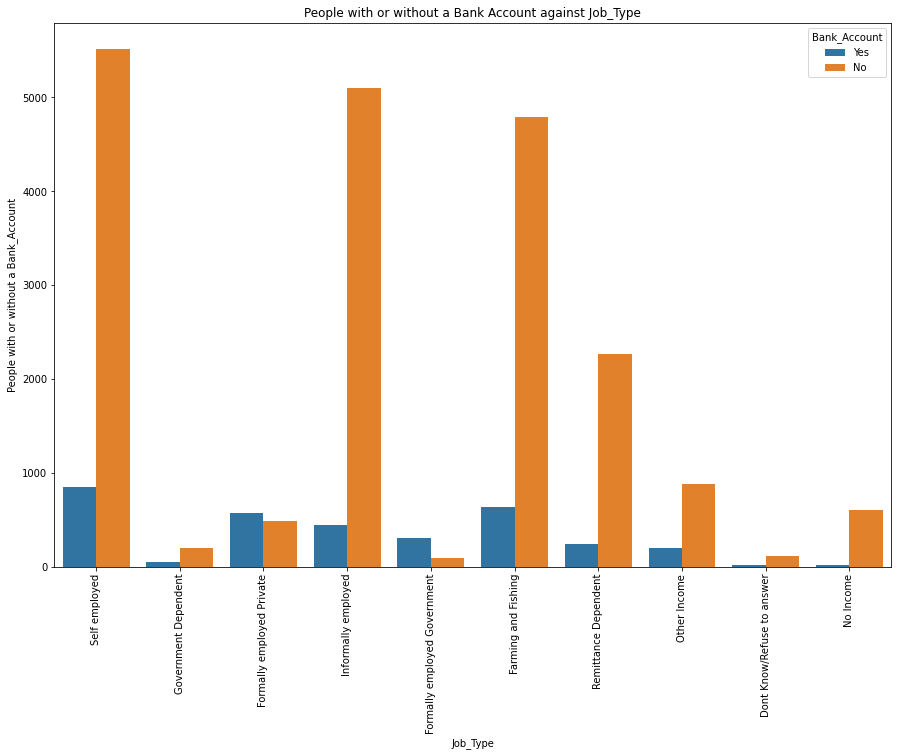

In [ ]:
# Plotting a bar graph of the number of people with or without a Bank Account against their Type of Job
plt.figure(figsize=(15,10))
sns.countplot(x='Job_Type',data=finance2, hue='Bank_Account')
# Labelling our x axis
plt.xlabel("Job_Type")
# Rotating the labels on the x axis
plt.xticks(rotation = 90)
# Labelling our y axis
plt.ylabel("People with or without a Bank_Account")
# Giving a title to our Bar chart
plt.title("People with or without a Bank Account against Job_Type")
# Displaying our chart
plt.show()

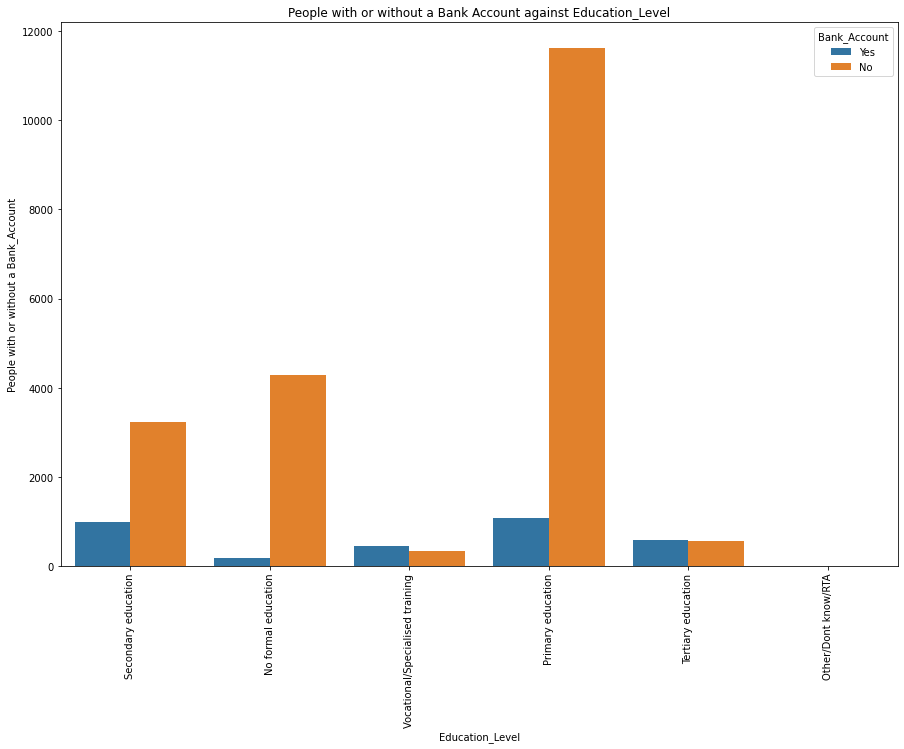

In [ ]:
# Plotting a bar graph of the number of people with or without a Bank Account against their Level of Education
plt.figure(figsize=(15,10))
sns.countplot(x='Education_Level',data=finance2, hue='Bank_Account')
# Labelling our x axis
plt.xlabel("Education_Level")
# Rotating the labels on the x axis
plt.xticks(rotation = 90)
# Labelling our y axis
plt.ylabel("People with or without a Bank_Account")
# Giving a title to our Bar chart
plt.title("People with or without a Bank Account against Education_Level")
# Displaying our chart
plt.show()

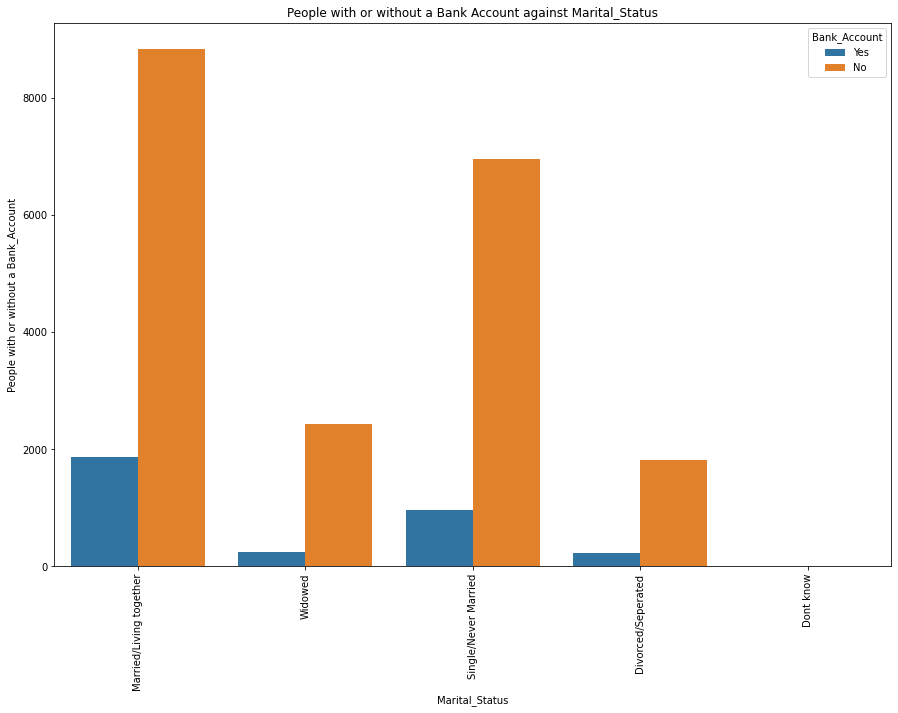

In [ ]:
# Plotting a bar graph of the number of people with or without a Bank Account against their Marital Status
plt.figure(figsize=(15,10))
sns.countplot(x='Marital_Status',data=finance2, hue='Bank_Account')
# Labelling our x axis
plt.xlabel("Marital_Status")
# Rotating the labels on the x axis
plt.xticks(rotation = 90)
# Labelling our y axis
plt.ylabel("People with or without a Bank_Account")
# Giving a title to our Bar chart
plt.title("People with or without a Bank Account against Marital_Status")
# Displaying our chart
plt.show()

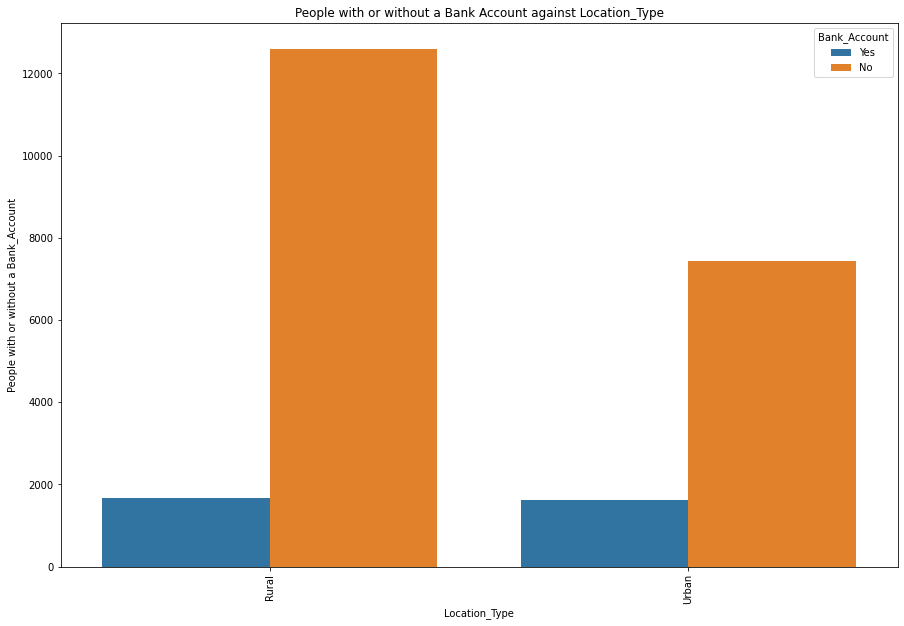

In [ ]:
# Plotting a bar graph of the number of people with or without a Bank Account against their Type of Location
plt.figure(figsize=(15,10))
sns.countplot(x='Location_Type',data=finance2, hue='Bank_Account')
# Labelling our x axis
plt.xlabel("Location_Type")
# Rotating the labels on the x axis
plt.xticks(rotation = 90)
# Labelling our y axis
plt.ylabel("People with or without a Bank_Account")
# Giving a title to our Bar chart
plt.title("People with or without a Bank Account against Location_Type")
# Displaying our chart
plt.show()

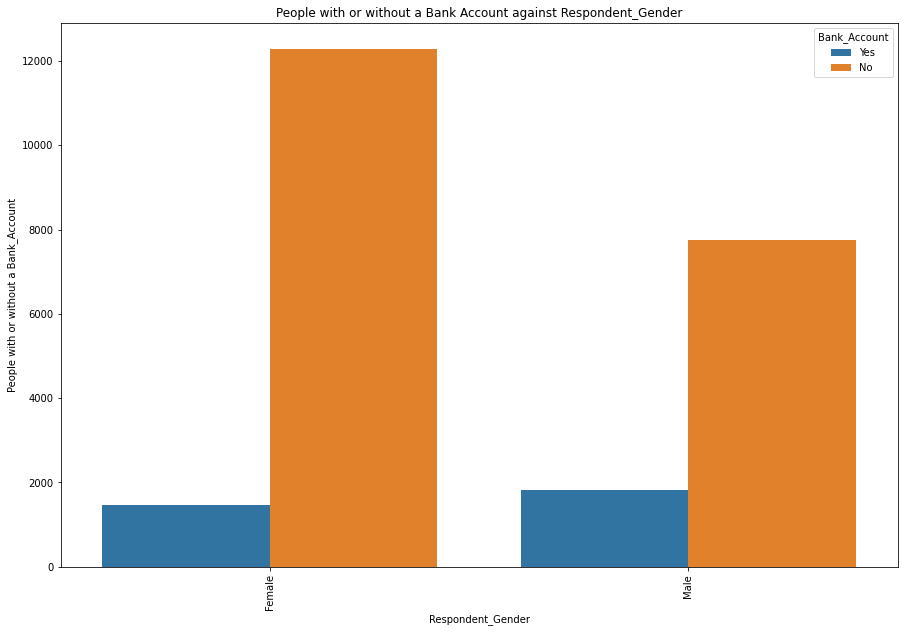

In [ ]:
# Plotting a bar graph of the number of people with or without a Bank Account against their Gender
plt.figure(figsize=(15,10))
sns.countplot(x='Respondent_Gender',data=finance2, hue='Bank_Account')
# Labelling our x axis
plt.xlabel("Respondent_Gender")
# Rotating the labels on the x axis
plt.xticks(rotation = 90)
# Labelling our y axis
plt.ylabel("People with or without a Bank_Account")
# Giving a title to our Bar chart
plt.title("People with or without a Bank Account against Respondent_Gender")
# Displaying our chart
plt.show()

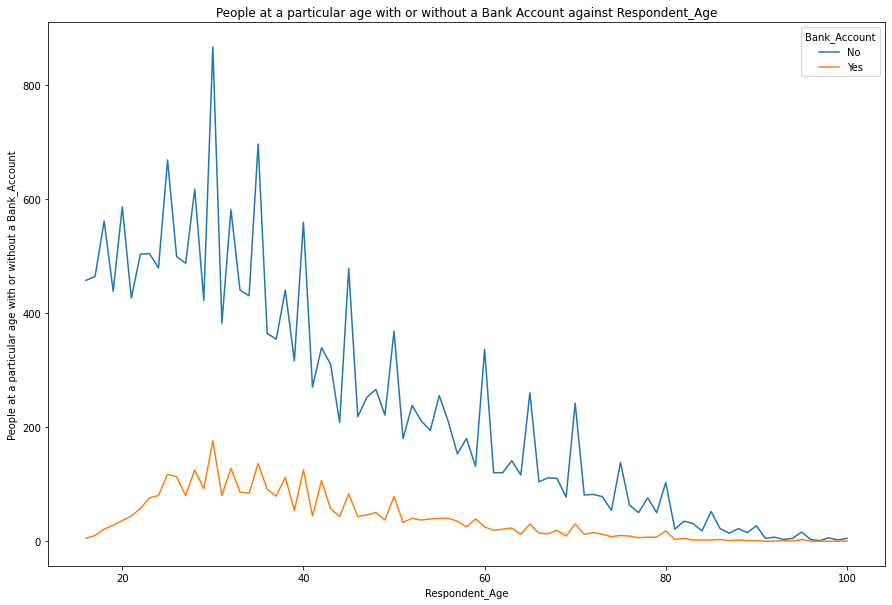

In [225]:
# Plotting a line graph of the number of people ata a particular age with or without an account against age
age = pd.crosstab(index=finance2["Respondent_Age"], columns=finance2["Bank_Account"])
age.plot(kind="line", figsize=(15,10))
# Labelling our x axis
plt.xlabel("Respondent_Age")
# Rotating the labels on the x axis
plt.xticks(rotation = 0)
# Labelling our y axis
plt.ylabel("People at a particular age with or without a Bank_Account")
# Giving a title to our Bar chart
plt.title("People at a particular age with or without a Bank Account against Respondent_Age")
# Displaying our chart
plt.show()
# Majprity of those with or without an account are 30 years while the minority are 100 years

## 6. Implementing the Solution

In [ ]:
#Converting the categorical data to numerical data to enable for correlation
finance2['Gender_Index']=finance2.Respondent_Gender.map({'Female':0,'Male':1})
finance2['Bank_Account_Index']=finance2.Bank_Account.map({'Yes':2,'No':3})
finance2['Location_Index'] = finance2.Location_Type.map({'Rural':4,'Urban':5}) 
finance2['Marital_Index'] = finance2.Marital_Status.map({'Married/Living together':6, 'Divorced/Seperated':7, 'Widowed':8, 'Single/Never Married':9, 'Don’t know':10})
finance2['Education_Index'] = finance2.Education_Level.map({'No formal education':11, 'Primary education':12, 'Secondary education':13, 'Vocational/Specialised training':14, 'Tertiary education':15, 'Other/Dont know/RTA':16})
finance2['Job_Index'] = finance2.Job_Type.map({'Farming and Fishing':17, 'Self employed':18, 'Formally employed Government':19, 'Formally employed Private':20, 'Informally employed':21, 'Remittance Dependent':22, 'Government Dependent':23, 'Other Income':24, 'No Income':25, 'Dont Know/Refuse to answer':26})
finance2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,Country,Bank_Account,Location_Type,Respondent_Age,Respondent_Gender,Marital_Status,Education_Level,Job_Type,Gender_Index,Bank_Account_Index,Location_Index,Marital_Index,Education_Index,Job_Index
0,Kenya,Yes,Rural,24,Female,Married/Living together,Secondary education,Self employed,0,2,4,6.0,13,18
1,Kenya,No,Rural,70,Female,Widowed,No formal education,Government Dependent,0,3,4,8.0,11,23
2,Kenya,Yes,Urban,26,Male,Single/Never Married,Vocational/Specialised training,Self employed,1,2,5,9.0,14,18
3,Kenya,No,Rural,34,Female,Married/Living together,Primary education,Formally employed Private,0,3,4,6.0,12,20
4,Kenya,No,Urban,26,Male,Single/Never Married,Primary education,Informally employed,1,3,5,9.0,12,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,No,Rural,48,Female,Divorced/Seperated,No formal education,Other Income,0,3,4,7.0,11,24
23520,Uganda,No,Rural,27,Female,Single/Never Married,Secondary education,Other Income,0,3,4,9.0,13,24
23521,Uganda,No,Rural,27,Female,Widowed,Primary education,Other Income,0,3,4,8.0,12,24
23522,Uganda,No,Urban,30,Female,Divorced/Seperated,Secondary education,Self employed,0,3,5,7.0,13,18


In [ ]:
#Showing the correlation between the numerical variables in the dataset
finance2.corr()
#Education_Index and Bank_Account_Index show a moderate negative correlation while the rest under Bank_Account_Indexgenerally have a weak correlation showing 
#that the Education_Level is the highest demographic factor contributing to whether one has a Bank Account

,Respondent_Age,Gender_Index,Bank_Account_Index,Location_Index,Marital_Index,Education_Index,Job_Index
Respondent_Age,1.000000,0.013215,-0.019264,-0.047915,-0.119953,-0.308066,-0.120785
Gender_Index,0.013215,1.000000,-0.116564,0.013218,-0.011945,0.108129,-0.071442
Bank_Account_Index,-0.019264,-0.116564,1.000000,-0.088409,0.073069,-0.364700,0.026408
Location_Index,-0.047915,0.013218,-0.088409,1.000000,0.263498,0.134438,0.090139
Marital_Index,-0.119953,-0.011945,0.073069,0.263498,1.000000,0.077612,0.095819
Education_Index,-0.308066,0.108129,-0.364700,0.134438,0.077612,1.000000,0.078607
Job_Index,-0.120785,-0.071442,0.026408,0.090139,0.095819,0.078607,1.000000


## 7. Challenging the solution

---



Why is it that there is only one variable moderately correlated to having or not having a Bank Account?

## 8. Follow up questions

### a). Did we have the right data?

No. Because most of the factors are weakly correlated to having a Bank Account

### b). Do we need other data to answer our question?

Yes. This is because there are additional factors including those which are demographic that contribute to if a a person has a bank account or not.

### c). Did we have the right question?

No. This is because the highest people with and without a bank account came from one particular category in each variable compared.